# Heart Disease Detection Model

**1. Imported Dataset and performed EDA**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('E:\ML\health\heart_disease_data.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
1,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
2,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
3,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
4,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.shape

(606, 14)

**2. Split the dataset into input and output/target columns**

In [7]:
# input columns: 
x = df.iloc[:, 0:13].values

# output columns:
y = df.iloc[:, 13]

**3. Preprocessing our input columns**

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
x = sc.fit_transform(x)

**4. Split the data into train and test set**

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

**5. Metrics to measure our model performance:**

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
print("Accuracy score: ", accuracy_score(y_test, dt.predict(x_test)))

Accuracy score:  0.9672131147540983


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

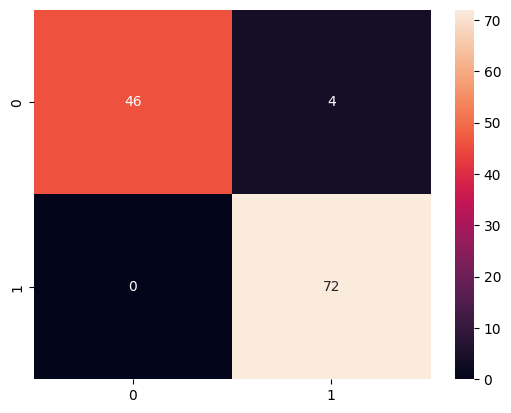

In [18]:
sns.heatmap(confusion_matrix(y_test, dt.predict(x_test)), annot=True)

**6. Visualization of the decision tree:**

In [32]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

[Text(0.4765625, 0.95, 'cp <= -0.453\ngini = 0.498\nsamples = 484\nvalue = [226, 258]'),
 Text(0.2544642857142857, 0.85, 'ca <= -0.225\ngini = 0.379\nsamples = 236\nvalue = [176, 60]'),
 Text(0.16071428571428573, 0.75, 'thal <= 0.305\ngini = 0.5\nsamples = 104\nvalue = [53, 51]'),
 Text(0.08928571428571429, 0.65, 'exang <= 0.369\ngini = 0.406\nsamples = 60\nvalue = [17, 43]'),
 Text(0.03571428571428571, 0.55, 'thalach <= -2.324\ngini = 0.157\nsamples = 35\nvalue = [3, 32]'),
 Text(0.017857142857142856, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.05357142857142857, 0.45, 'chol <= 1.357\ngini = 0.059\nsamples = 33\nvalue = [1, 32]'),
 Text(0.03571428571428571, 0.35, 'gini = 0.0\nsamples = 31\nvalue = [0, 31]'),
 Text(0.07142857142857142, 0.35, 'oldpeak <= -0.379\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05357142857142857, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.08928571428571429, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.142857142

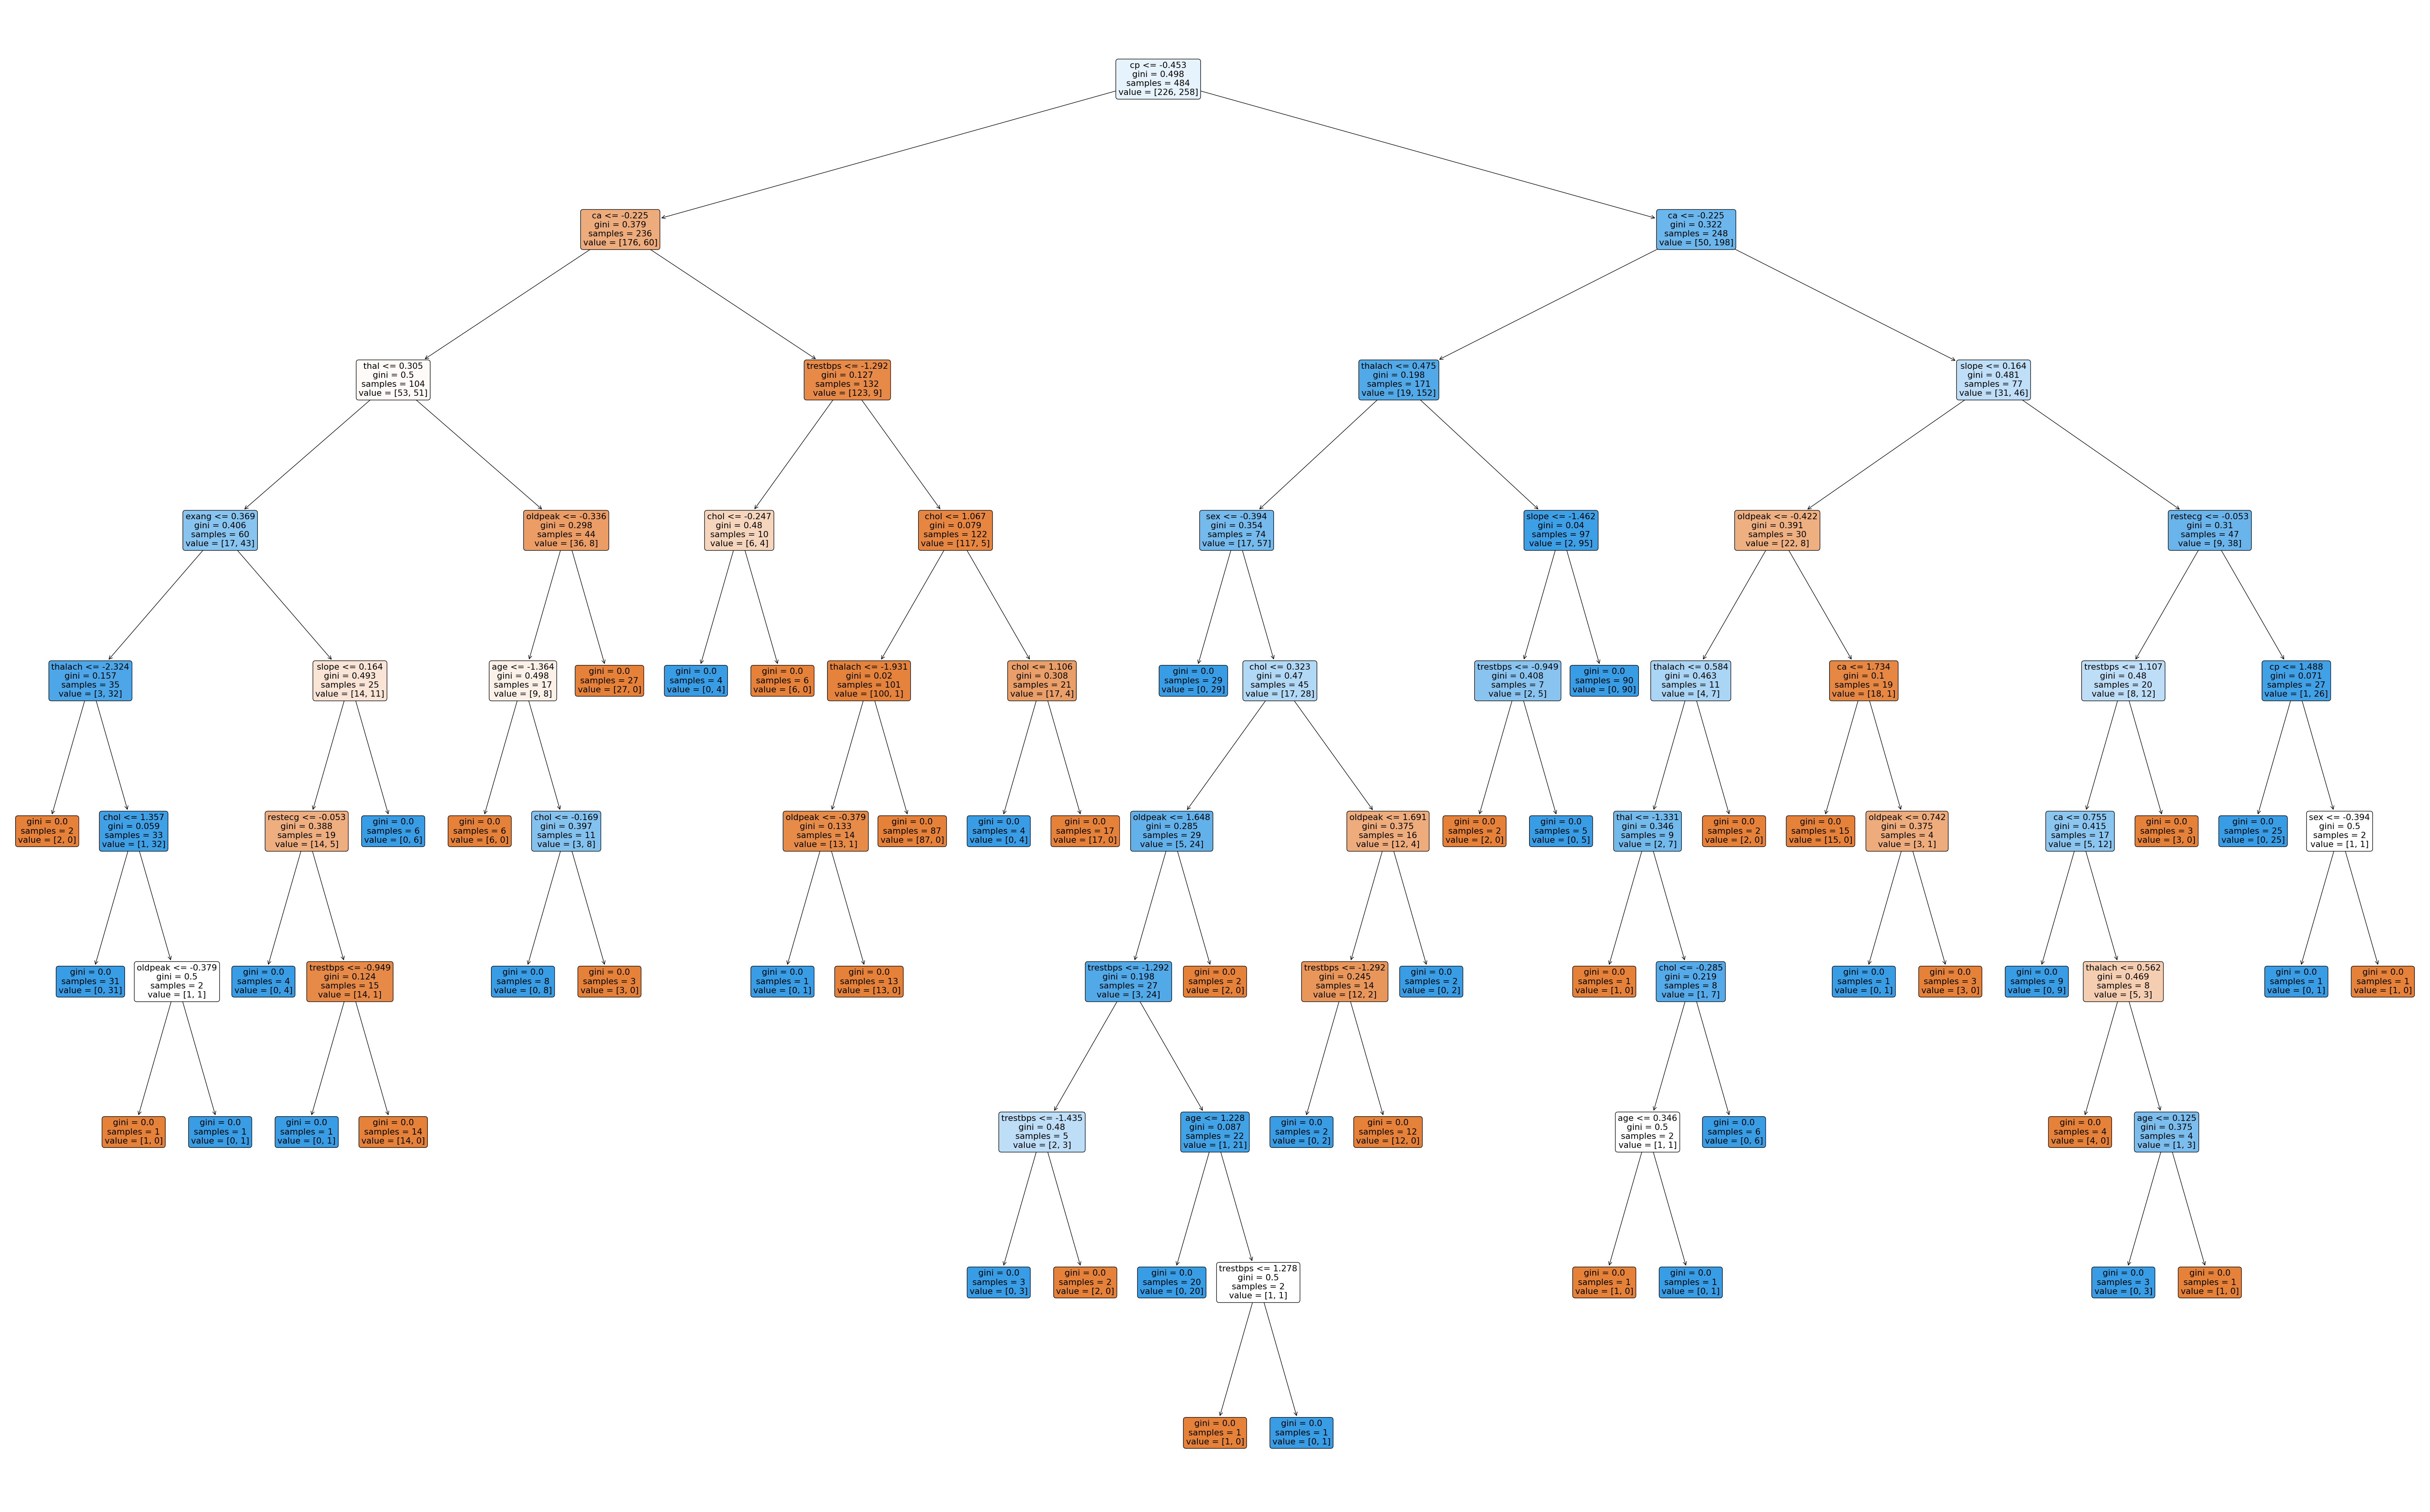

In [37]:
from matplotlib.pylab import rcParams
from sklearn.tree import plot_tree
rcParams['figure.figsize'] = 80,50
import graphviz
tree.plot_tree(dt, feature_names=cols, rounded=True, filled=True)